Coefficients: 
 [57.28271956]
MSE Mean squared error: 246.06
r2 Coefficient of determination: 0.94


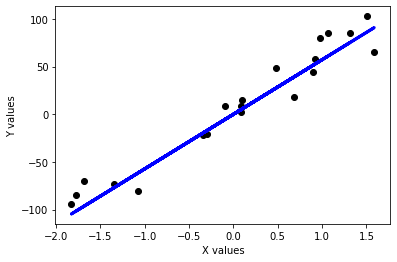

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,noise=15.5)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train,y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("MSE Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("r2 Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
# Plot outputs
plt.scatter(X_test,y_test, color="black")
plt.plot(X_test,y_pred, color="blue", linewidth=3)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.xticks()
plt.yticks()
plt.show()

In [52]:
import warnings
warnings.filterwarnings('ignore')

Best parameters:  Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001) 

MSE Mean squared error: 112020.44
r2 Coefficient of determination: 0.70


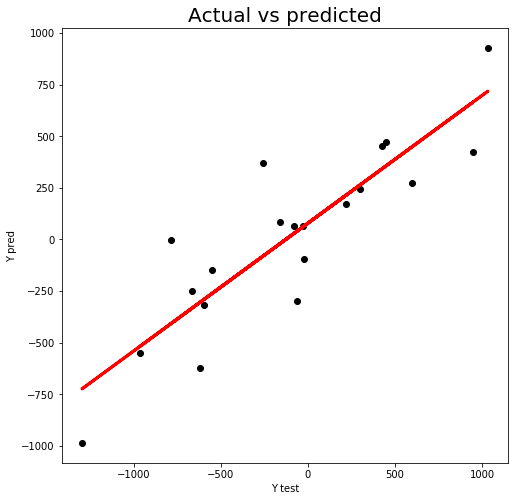

In [81]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X,y = make_regression(n_samples=100,n_features=110,n_informative=105,noise=15.5)
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create linear regression object
ridge = Ridge()
# Train the model using the training sets
parameters = {'alpha':list(np.arange(0,1000,10))}
gs = GridSearchCV(ridge, parameters)
gs.fit(X_train,y_train)
print('Best parameters: ',gs.best_estimator_,'\n')
model = gs.best_estimator_
y_pred = model.predict(X_test)
print("MSE Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("r2 Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred)
line = slope*y_test+intercept
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred, color="black")
plt.plot(y_test,line,color='red',linewidth=3)
plt.title('Actual vs predicted',fontsize=20)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.xticks()
plt.yticks()
plt.show()

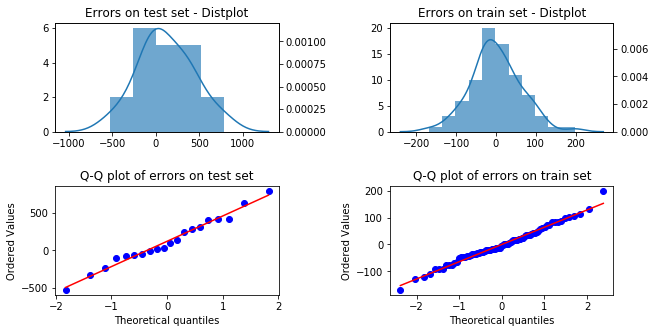

In [82]:
import seaborn as sns
from scipy.stats import norm
from scipy import stats

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

errors_test = (y_pred_test - y_test)
errors_train = (y_pred_train - y_train)

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.title('Errors on test set - Distplot')
ax_test = sns.distplot(errors_test, kde=False)
second_ax1 = ax_test.twinx()
sns.distplot(errors_test, ax=second_ax1, kde=True, hist=True)
plt.subplot(2,2,2)
plt.title('Errors on train set - Distplot')
ax_train = sns.distplot(errors_train, kde=False)
second_ax2 = ax_train.twinx()
sns.distplot(errors_train, ax=second_ax2, kde=True)
plt.subplot(2,2,3)
res = stats.probplot(errors_test, plot=plt)
plt.title('Q-Q plot of errors on test set')
plt.subplot(2,2,4)
res = stats.probplot(errors_train, plot=plt)
plt.title('Q-Q plot of errors on train set')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

Best parameters:  Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False) 

MSE Mean squared error: 18.77
r2 Coefficient of determination: 0.78


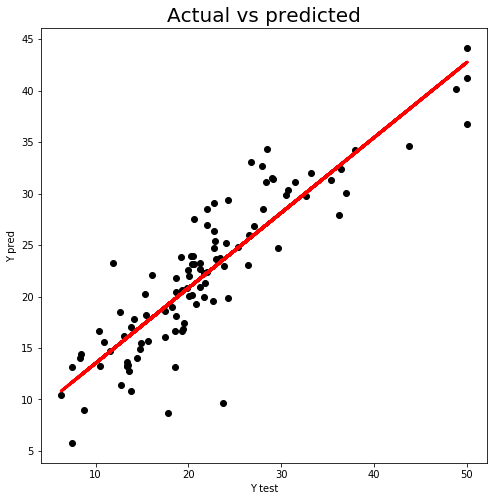

In [121]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
boston = load_boston()
X = scaler.fit_transform(boston["data"])#.reshape(-1,1)
y = boston["target"]#.reshape(-1,1)
names = boston["feature_names"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create linear regression object
Lasso = Lasso()
# Train the model using the training sets
parameters = {'alpha':list(np.arange(0,1,1000))}
gs = GridSearchCV(Lasso, parameters)
gs.fit(X_train,y_train)
print('Best parameters: ',gs.best_estimator_,'\n')
model = gs.best_estimator_
y_pred = model.predict(X_test)
print("MSE Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("r2 Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred)
line = slope*y_test+intercept
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred, color="black")
plt.plot(y_test,line,color='red',linewidth=3)
plt.title('Actual vs predicted',fontsize=20)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.xticks()
plt.yticks()
plt.show()

# see if any coefficients go to zero. If they do, features associated with them are useless.

In [125]:
model.coef_

array([-0.68632198,  1.33775775,  0.21445284,  0.66064063, -2.11304949,
        2.37253579,  0.29986327, -3.28452015,  2.80167496, -2.29024757,
       -1.7436046 ,  0.79099751, -4.26836601])

# number of original columns in the Boston dataset

In [127]:
len(pd.DataFrame(boston['data']).columns)

13

Best parameters:  SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

MSE Mean squared error: 37.91
r2 Coefficient of determination: 0.59


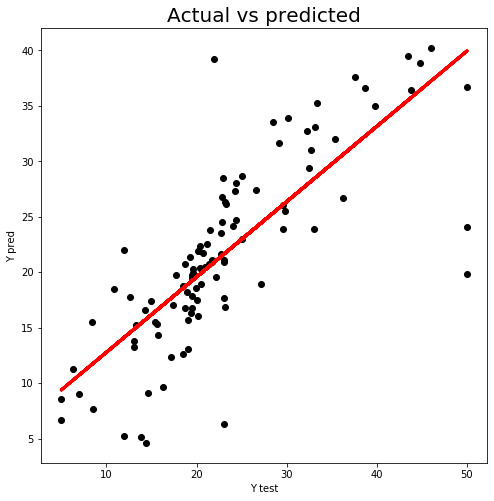

In [132]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
boston = load_boston()
X = scaler.fit_transform(boston["data"])
y = boston["target"]
names = boston["feature_names"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Create linear regression object
sgd = SGDRegressor()
# Train the model using the training sets
parameters = {'alpha':list(np.arange(0,10,1000)),'penalty':['l2', 'l1', 'elasticnet']}
gs = GridSearchCV(sgd, parameters)
gs.fit(X_train,y_train)
print('Best parameters: ',gs.best_estimator_,'\n')
model = gs.best_estimator_
y_pred = model.predict(X_test)
print("MSE Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("r2 Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred)
line = slope*y_test+intercept
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred, color="black")
plt.plot(y_test,line,color='red',linewidth=3)
plt.title('Actual vs predicted',fontsize=20)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.xticks()
plt.yticks()
plt.show()